# Employee Demographic Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import collections
import sklearn as sk

In [2]:
df = pd.read_csv(r'emp_detail.csv') 

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.shape

(607, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [13]:
df.drop('salary', axis = 1, inplace = True)

In [14]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


#### Average Salary by Year

In [22]:
df1 = df.groupby('work_year')['salary_in_usd'].mean().round(2).sort_values(ascending = False)
df1

work_year
2022    124522.01
2021     99853.79
2020     95813.00
Name: salary_in_usd, dtype: float64

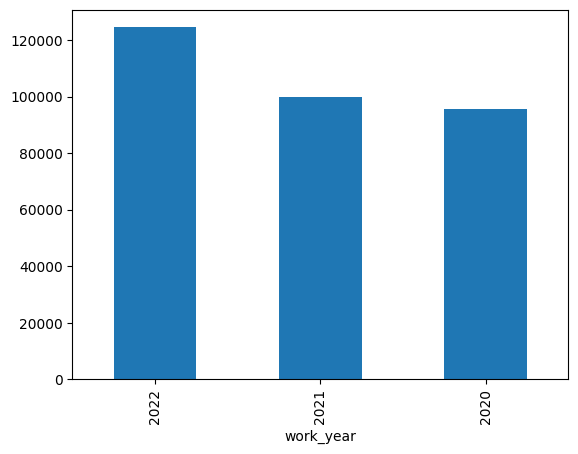

In [114]:
df1.plot(kind = 'bar')
plt.show()

# Remote ratio

In [26]:
df2 = df.remote_ratio.value_counts()
df2

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [32]:
values = df2.to_list()

In [30]:
labels = ['Fully Remote', 'in-Office', 'Hybrid']

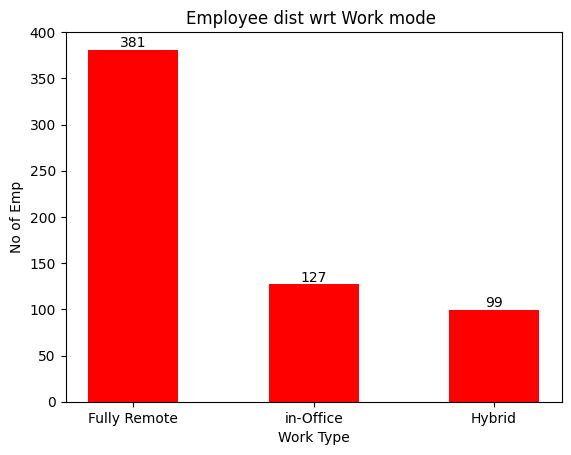

In [38]:
z = plt.bar(labels, values, width = 0.5, color = 'red' )
plt.bar_label(z , labels = values)
plt.xlabel('Work Type')
plt.ylabel('No of Emp')
plt.title('Employee dist wrt Work mode ')
plt.show()

# Company Size

In [40]:
df3 = df.company_size.value_counts()
df3

company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [41]:
df3.index

Index(['M', 'L', 'S'], dtype='object', name='company_size')

In [42]:
df3.values

array([326, 198,  83], dtype=int64)

In [44]:
df3.index.to_list()

['M', 'L', 'S']

In [50]:
legends = ['Medium', 'Large', 'Small']

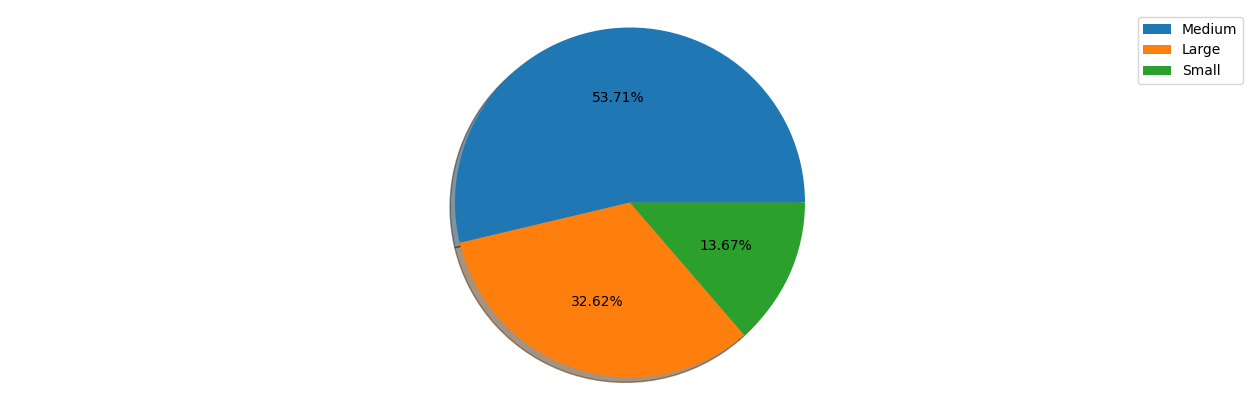

In [58]:
plt.figure(figsize = (16,5))
plt.pie(x = df3.values, autopct = '%1.2f%%', shadow = True )
plt.axis('equal')
plt.legend(labels = legends, loc = 'upper right')
plt.show()

# Designation

In [60]:
df4 = df['job_title'].value_counts()[:5]
df4

job_title
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: count, dtype: int64

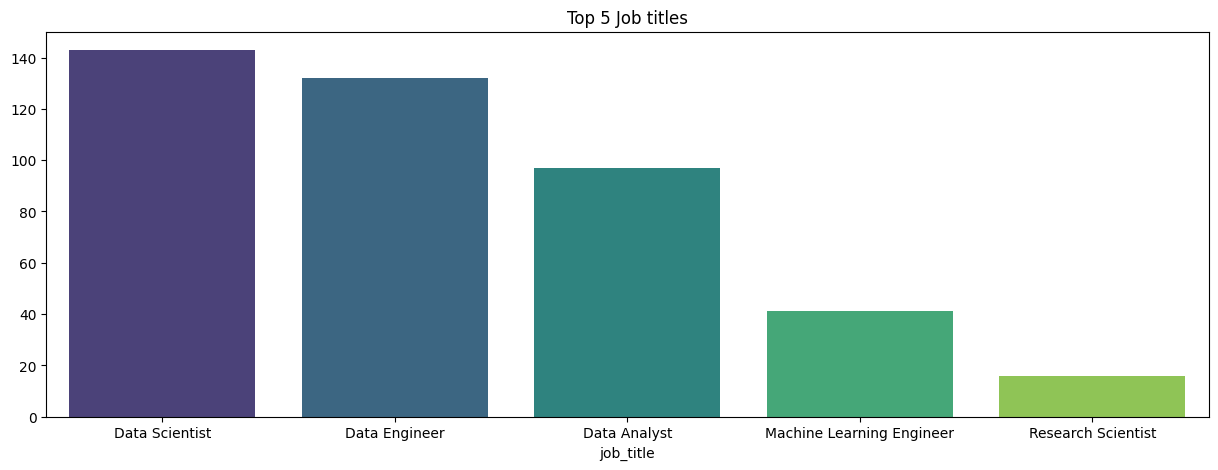

In [71]:
plt.figure(figsize = (15,5))
sns.barplot(x = df4.index,  y = df4.values, hue = df4.index, palette = 'viridis' )
plt.title('Top 5 Job titles')
plt.show()

# Salary

In [75]:
df5 = df[['salary_in_usd', 'company_size']]
df5

,salary_in_usd,company_size
0,79833,L
1,260000,S
2,109024,M
3,20000,S
4,150000,L
...,...,...
602,154000,M
603,126000,M
604,129000,M
605,150000,M


In [78]:
S = df5[df5['company_size']== 'S']
M = df5[df5['company_size']== 'M']
L = df5[df5['company_size']== 'L']

In [80]:
sal_mean = S['salary_in_usd'].mean(),M['salary_in_usd'].mean(),L['salary_in_usd'].mean()

In [87]:
sal_mean

(77632.67469879518, 116905.46625766871, 119242.99494949495)

In [102]:
labels = ['Small', 'Medium', 'large']

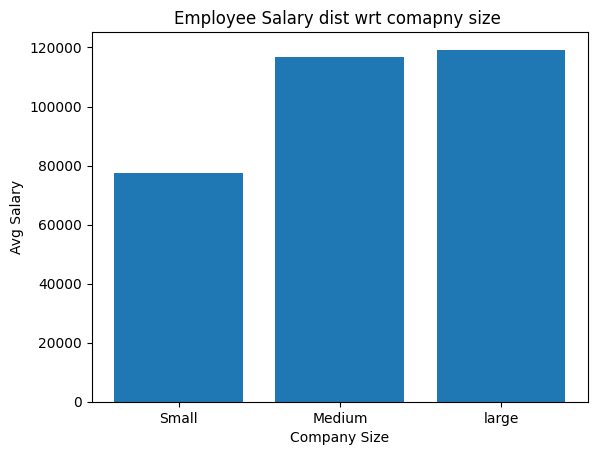

In [104]:
plt.bar(labels, sal_mean)
plt.xlabel('Company Size')
plt.ylabel('Avg Salary')
plt.title('Employee Salary dist wrt comapny size ')
plt.show()

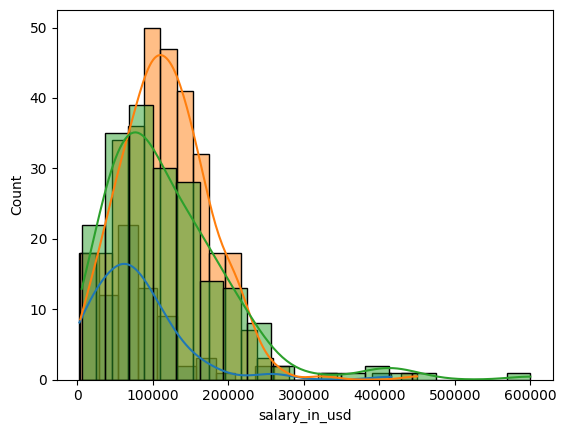

In [95]:
sns.histplot(S['salary_in_usd'], label = "S", kde = True)
sns.histplot(M['salary_in_usd'], label = "M", kde = True)
sns.histplot(L['salary_in_usd'], label = "L", kde = True)
plt.show()

### Experience level distribution

In [106]:
df6 = df['experience_level'].value_counts()
df6

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [107]:
data = {
    'Exp Level' : df6.index,
    'Value' : df6.values,
    'info' : df6.values    
}

df7 = pd.DataFrame(data)
df7

,Exp Level,Value,info
0,SE,280,280
1,MI,213,213
2,EN,88,88
3,EX,26,26


In [111]:
df7['Exp Level'].replace('SE', 'Senior')
df7['Exp Level'].replace('MI', 'Middle')
df7['Exp Level'].replace('EN', 'Entry Level')
df7['Exp Level'].replace('EX', 'Executive')
df7

,Exp Level,Value,info
0,Senior,280,280
1,Middle,213,213
2,Entry Level,88,88
3,Executive,26,26


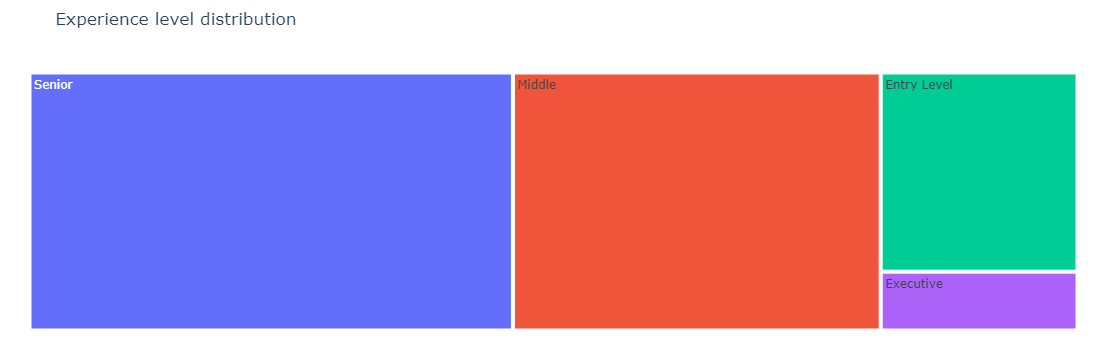

In [125]:
fig = px.treemap(df7, path = ['Exp Level'], values = 'Value', title = 'Experience level distribution')
fig.update_traces(hovertemplate = 'Exp Level : %{label}<br>Value:{value}')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [127]:
df8 = df['employee_residence'].value_counts()[:5]
df8

employee_residence
US    332
GB     44
IN     30
CA     29
DE     25
Name: count, dtype: int64

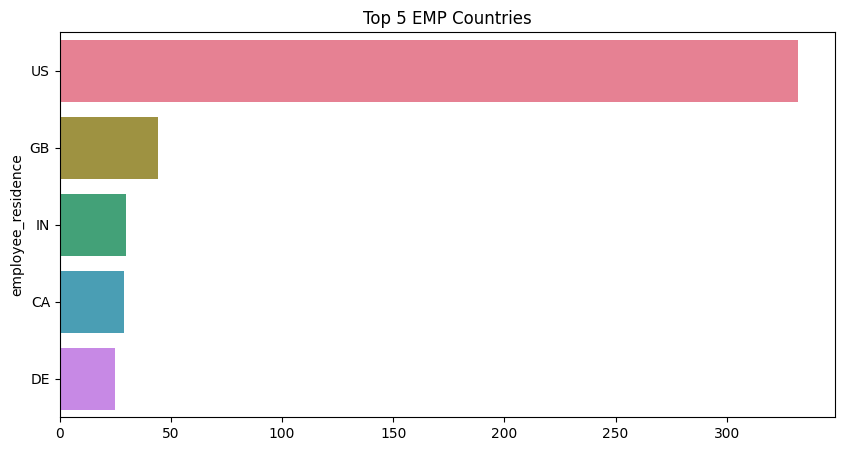

In [140]:
plt.figure(figsize = (10,5))
sns.barplot(x = df8.values,  y = df8.index, hue = df8.index, palette = 'husl')
plt.title('Top 5 EMP Countries')
plt.show()